In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# u, v are N-by-2 matrices, representing N corresponding points for v = T(u)
# this function should return a 3-by-3 homography matrix
def solve_homography(u, v):
    N = u.shape[0]
    if v.shape[0] is not N:
        print('u and v should have the same size')
        return None
    if N < 4:
        print('At least 4 points should be given')
#     A = np.zeros((2*N, 8))
    # if you take solution 2:
    A = []
    for i in range(len(u)):
        u_x, u_y = u[i][0], u[i][1]
        v_x, v_y = v[i][0], v[i][1]
        A.append([u_x, u_y, 1, 0, 0, 0, -u_x*v_x, -u_y*v_x, -v_x])
        A.append([0, 0, 0, u_x, u_y, 1, -u_x*v_y, -u_y*v_y, -v_y])
    A = np.array(A)
    # compute H from A
    U, s, Vh = np.linalg.svd(A.T.dot(A))
    H = U[:,-1].reshape((3,3))
    return H

In [12]:
# xxx_corners are 4-by-2 arrays, representing corner (x, y) pairs
def transform(img, canvas, img_corners, canvas_corners, fill_canvas=False):
    u = img_corners
    v = canvas_corners
    H = solve_homography(u, v)
    if not fill_canvas: # Part 1: assume that img is a rectangle (can know x,y of image pixels)
        for y in range(len(img)):
            for x in range(len(img[y])): # x,y are coordinates on img
                new_x, new_y, extra_dim = H.dot(np.array([x,y,1]))
                new_x /= extra_dim
                new_y /= extra_dim
                new_x = int(round(new_x))
                new_y = int(round(new_y))
        #         print(img1[y][x])
                canvas[new_y][new_x] = img[y][x]
    else: # Part 2: assume that canvas is a rectangle (can know x,y of canvas pixels)
        H_inv = np.linalg.inv(H)
        for new_y in range(len(canvas)):
            for new_x in range(len(canvas[new_y])): # new_x,new_y are coordinates on canvas
                x, y, extra_dim = H_inv.dot(np.array([new_x,new_y,1]))
                x /= extra_dim
                y /= extra_dim
                x = int(round(x))
                y = int(round(y))
        #         print(img1[y][x])
                canvas[new_y][new_x] = img[y][x]
    # TODO: get x,y of img pixels by using H.inv() on canvas coordinates

In [4]:
canvas = cv2.imread('./input/times_square.jpg')
img1 = cv2.imread('./input/wu.jpg')
img2 = cv2.imread('./input/ding.jpg')
img3 = cv2.imread('./input/yao.jpg')
img4 = cv2.imread('./input/kp.jpg')
img5 = cv2.imread('./input/lee.jpg')

In [5]:
corners1 = np.array([[818, 352], [884, 352], [818, 407], [885, 408]])
corners2 = np.array([[311, 14], [402, 150], [157, 152], [278, 315]])
corners3 = np.array([[364, 674], [430, 725], [279, 864], [369, 885]])
corners4 = np.array([[808, 495], [892, 495], [802, 609], [896, 609]])
corners5 = np.array([[1024, 608], [1118, 593], [1032, 664], [1134, 651]])

In [31]:
img = cv2.imread('./input/screen.jpg')
# TODO: some magic
canvas_qrcode = np.zeros((200, 200, 3))
h, w, ch = canvas_qrcode.shape
corners_qrcode = np.array([[1038, 390], [1090, 415], [991, 537], [1040, 576]])
transform(img, canvas_qrcode,
          img_corners=corners_qrcode,
          canvas_corners=np.array([[0,0], [w-1,0], [0,h-1], [w-1,h-1]]),
          fill_canvas=True)
canvas_qrcode *= 1.5
cv2.imwrite('part2.png', canvas_qrcode)

True

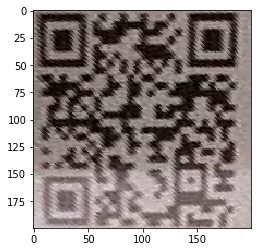

In [28]:
plt.imshow(canvas_qrcode.astype('uint8'))

In [182]:
cv2.imwrite('test_canvas.png', test_canvas)

True

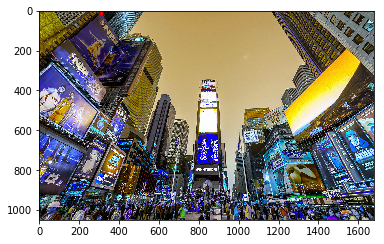

In [168]:
plt.imshow(canvas)
plt.scatter(311, 14, s=10, c='red', marker='o')
plt.show()